<a href="https://colab.research.google.com/github/jhnnxyz/AI-Mixtape/blob/main/notebooks/00_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jhnnxyz/AI-Mixtape.git
%cd AI-Mixtape/
%env PYTHONPATH=.:$PYTHONPATH
!pip install fastai --upgrade

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.185646,0.041322,0.012179,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.060042,0.008257,0.004736,00:52


In [11]:
img = '/content/AI-Mixtape/731db7445b4b7d1fba9f5944bbc74420.jpg'
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")


Is this a cat?: False.
Probability it's a cat: 0.000002


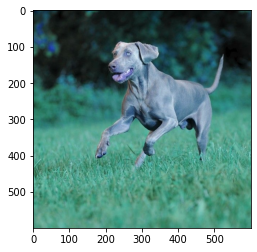

In [15]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
img = cv.imread(img) # reads image
plt.imshow(img)

In [18]:
img = '/content/R.78315eb437003b1f6ad1187f4dc3e905.jpeg'
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


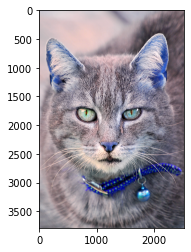

In [19]:
img = cv.imread(img) # reads image
plt.imshow(img)